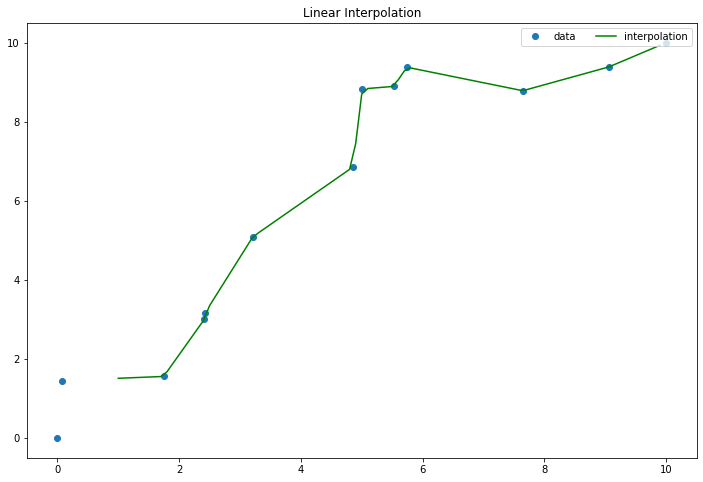

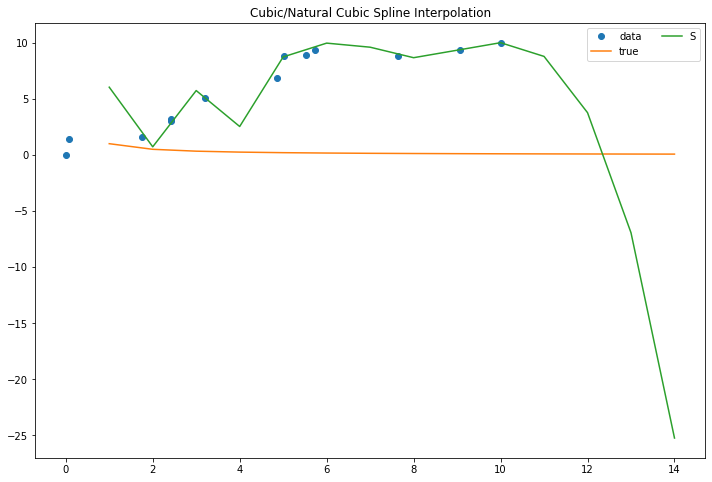

NameError: name 'ns' is not defined

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline, interp1d
plt.rcParams['figure.figsize'] =(12,8)
  
x = [0,     0.074,  1.746,  2.416,  2.428,  3.213,  4.853,  5.01,   5.526,  5.741,  7.645,  9.058, 10]
y = [0,     1.453,  1.558,  3.008,  3.171,  5.094,  6.852,  8.83,   8.895,  9.38,  8.785,  9.386, 10]
# apply cubic spline interpolation
cs = CubicSpline(x, y, extrapolate=True)
# apply natural cubic spline interpolation

# Apply Linear interpolation
linear_int = interp1d(x,y)
  
xs = np.arange(1, 10, 0.1)
ys = linear_int(xs)
  
# plot linear interpolation
plt.plot(x, y,'o', label='data')
plt.plot(xs,ys,  label="interpolation", color='green')
plt.legend(loc='upper right', ncol=2)
plt.title('Linear Interpolation')
plt.show()
  
# define a new xs
xs = np.arange(1,15)
#plot cubic spline and natural cubic spline
plt.plot(x, y, 'o', label='data')
plt.plot(xs, 1/(xs), label='true')
plt.plot(xs, cs(xs), label="S")

  
plt.legend(loc='upper right', ncol=2)
plt.title('Cubic/Natural Cubic Spline Interpolation')
plt.show()
  
# check for boundary condition
print("Value of double differentiation at boundary conditions are %s and %s"
      %(ns(2,2),ns(10,2)))

In [27]:
from typing import Tuple, List
import numpy as np
import bisect

def compute_changes(x: List[float]) -> List[float]:
    return [x[i+1] - x[i] for i in range(len(x) - 1)]

def create_tridiagonalmatrix(n: int, h: List[float]) -> Tuple[List[float], List[float], List[float]]:
    A = [h[i] / (h[i] + h[i + 1]) for i in range(n - 2)] + [0]
    B = [2] * n
    C = [0] + [h[i + 1] / (h[i] + h[i + 1]) for i in range(n - 2)]
    return A, B, C

def create_target(n: int, h: List[float], y: List[float]):
    return [0] + [6 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1]) / (h[i] + h[i-1]) for i in range(1, n - 1)] + [0]

def solve_tridiagonalsystem(A: List[float], B: List[float], C: List[float], D: List[float]):
    c_p = C + [0]
    d_p = [0] * len(B)
    X = [0] * len(B)

    c_p[0] = C[0] / B[0]
    d_p[0] = D[0] / B[0]
    for i in range(1, len(B)):
        c_p[i] = c_p[i] / (B[i] - c_p[i - 1] * A[i - 1])
        d_p[i] = (D[i] - d_p[i - 1] * A[i - 1]) / (B[i] - c_p[i - 1] * A[i - 1])

    X[-1] = d_p[-1]
    for i in range(len(B) - 2, -1, -1):
        X[i] = d_p[i] - c_p[i] * X[i + 1]

    return X

def compute_spline(x: List[float], y: List[float]):
    n = len(x)
    if n < 3:
        raise ValueError('Too short an array')
    if n != len(y):
        raise ValueError('Array lengths are different')

    h = compute_changes(x)
    if any(v < 0 for v in h):
        raise ValueError('X must be strictly increasing')

    A, B, C = create_tridiagonalmatrix(n, h)
    D = create_target(n, h, y)

    M = solve_tridiagonalsystem(A, B, C, D)
    coefficients = [[(M[i+1]-M[i])*h[i]*h[i]/6, M[i]*h[i]*h[i]/2, (y[i+1] - y[i] - (M[i+1]+2*M[i])*h[i]*h[i]/6), y[i]] for i in range(n-1)]

    def spline(val):
        idx = min(bisect.bisect(x, val)-1, n-2)
        z = (val - x[idx]) / h[idx]
        C = coefficients[idx]
        return (((C[0] * z) + C[1]) * z + C[2]) * z + C[3]

    return spline

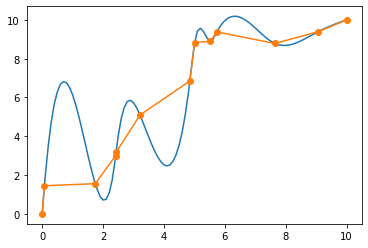

In [28]:
import matplotlib.pyplot as plt

test_x = [0,     0.074,  1.746,  2.416,  2.428,  3.213,  4.853,  5.01,   5.526,  5.741,  7.645,  9.058, 10]
test_y = [0,     1.453,  1.558,  3.008,  3.171,  5.094,  6.852,  8.83,   8.895,  9.38,  8.785,  9.386, 10]
spline = compute_spline(test_x, test_y)

n = len(test_x)

x_vals = [v for v in np.arange(0, 10,0.1)]
y_vals = [spline(y) for y in x_vals]

plt.plot(x_vals, y_vals)
plt.plot(test_x, test_y,'o-')

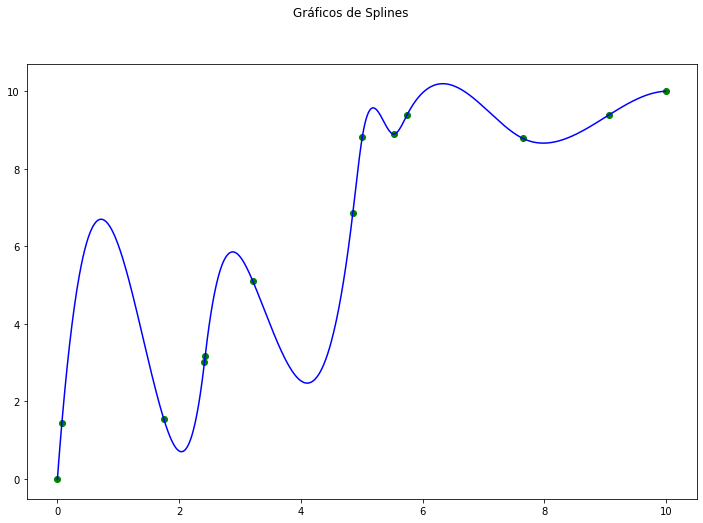

In [109]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np

x = [0,     0.074,  1.746,  2.416,  2.428,  3.213,  4.853,  5.01,   5.526,  5.741,  7.645,  9.058, 10]
y = [0,     1.453,  1.558,  3.008,  3.171,  5.094,  6.852,  8.83,   8.895,  9.38,  8.785,  9.386, 10]

f3 = interp1d(x,y,kind='cubic')

fig, axs = plt.subplots(1)
fig.suptitle('Gráficos de Splines')

xnew = np.arange(0, 10, 0.01)

#axs[0].plot(x,y,'go')
plt.plot(x,y,'go',xnew,f3(xnew),'b-')



{0: {'eq': '0+20.10795268634497*(x+0)+0.0*(x+0)**2-86.34359956351977*(x+0)**3', 'domain': [0, 0.074]}, 1: {'eq': '1.453+18.689500032715465*(x-0.074)-19.168279103101387*(x-0.074)**2+4.801380202037303*(x-0.074)**3', 'domain': [0.074, 1.746]}, 2: {'eq': '1.558-5.141240275858814*(x-1.746)+4.915443990317725*(x-1.746)**2+8.937562724044446*(x-1.746)**3', 'domain': [1.746, 2.416]}, 3: {'eq': '3.008+13.481670391637588*(x-2.416)+22.87994506564706*(x-2.416)**2-1200.6694381392156*(x-2.416)**3', 'domain': [2.416, 2.428]}, 4: {'eq': '3.171+13.512099875936974*(x-2.428)-20.344154707364744*(x-2.428)**2+7.964206414875692*(x-2.428)**3', 'domain': [2.428, 3.213]}, 5: {'eq': '5.094-3.7049937206053585*(x-3.213)-1.5884486003324887*(x-3.213)**2+2.74464628370867*(x-3.213)**3', 'domain': [3.213, 4.853]}, 6: {'eq': '6.852+13.230896804292586*(x-4.853)+11.915211115514163*(x-4.853)**2-101.53997463502093*(x-4.853)**3', 'domain': [4.853, 5.01]}, 7: {'eq': '8.83+9.463696590228139*(x-5.01)-35.9101169375807*(x-5.01)**2+

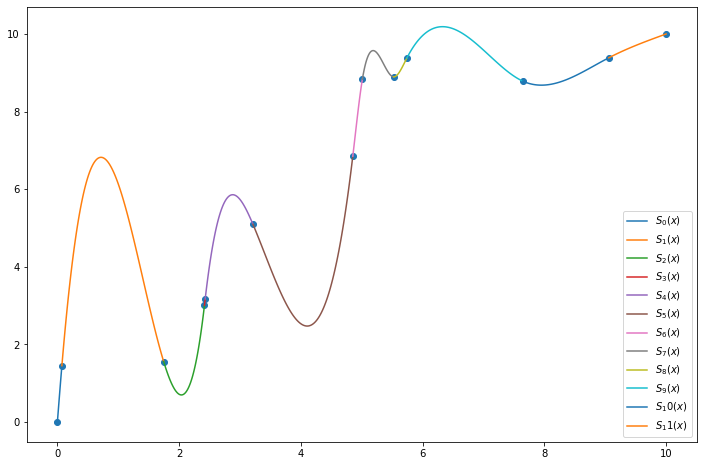

In [112]:
import matplotlib.pyplot as plt
import numpy as np

def spline(x,y):

    n = len(x)
    a = {k: v for k, v in enumerate(y)}
    h = {k: x[k+1] - x[k] for k in range (n-1)}

    A = [[1] + [0] * (n-1)]
    for i in range (1, n-1):
        row = [0] * n
        row[i-1] = h[i-1]
        row[i] = 2*(h[i-1] + h[i])
        row[i+1] = h[i]
        A.append(row)
    A.append([0] * (n-1) + [1])

    B = [0]
    for k in range (1, n-1):
        row = 3*(a[k+1] - a[k]) / h[k] - 3 * (a[k] - a[k-1]) / h[k-1]
        B.append(row)
    B.append(0)
    
    c = dict(zip(range(n), np.linalg.solve(A, B)))

    b = {}
    d = {}
    for k in range (n-1):
        b[k] = (1/h[k]) * (a[k+1] - a[k]) - (h[k]/3) * (2*c[k]+c[k+1])
        d[k] = (c[k+1] - c[k]) / (3*h[k])
    
    s = {}
    for k in range (n-1):
        eq = f'{a[k]}{b[k]:+}*(x{-x[k]:+}){c[k]:+}*(x{-x[k]:+})**2{d[k]:+}*(x{-x[k]:+})**3'
        s[k] = {'eq': eq, 'domain': [x[k], x[k+1]]}
    
    return s
    
   

x = [0,     0.074,  1.746,  2.416,  2.428,  3.213,  4.853,  5.01,   5.526,  5.741,  7.645,  9.058, 10]
y = [0,     1.453,  1.558,  3.008,  3.171,  5.094,  6.852,  8.83,   8.895,  9.38,  8.785,  9.386, 10]

eqs = spline(x, y)
print(eqs)

for key, value in eqs.items():
    def p(x):
        return eval(value['eq'])
    t = np.linspace(*value['domain'], 100)
    plt.plot(t, p(t), label=f"$S_{key}(x)$")
    
    

plt.scatter(x, y)
plt.legend()
plt.show()